In [1]:
#import datasets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
import math
from sklearn.metrics import r2_score
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression

In [2]:
#Read the csv. file
data = pd.read_csv('cars.csv')
data = data.reset_index(drop=True)
data.head()

,Id,year,brand,full_model_name,model_name,price,distance_travelled(kms),fuel_type,city,brand_rank,car_age
0,0,2016,Honda,Honda Brio S MT,Brio,425000.0,9680.0,Petrol,Mumbai,7,5.0
1,1,2012,Nissan,Nissan Sunny XV Diesel,Sunny,325000.0,119120.0,Diesel,Mumbai,11,9.0
2,2,2017,Toyota,Toyota Fortuner 2.8 4x2 MT [2016-2020],Fortuner,2650000.0,64593.0,Diesel,Thane,1,4.0
3,3,2017,Mercedes-Benz,Mercedes-Benz E-Class E 220d Expression [2019-...,E-Class,4195000.0,25000.0,Diesel,Mumbai,2,4.0
4,4,2012,Hyundai,Hyundai Verna Fluidic 1.6 CRDi SX,Verna,475000.0,23800.0,Diesel,Mumbai,14,9.0


In [3]:
#checked for null values 
data.isnull().sum()

Id                         0
year                       0
brand                      0
full_model_name            0
model_name                 0
price                      0
distance_travelled(kms)    0
fuel_type                  0
city                       0
brand_rank                 0
car_age                    0
dtype: int64

In [4]:
#classification of objects and int/floats
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1725 entries, 0 to 1724
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Id                       1725 non-null   int64  
 1   year                     1725 non-null   int64  
 2   brand                    1725 non-null   object 
 3   full_model_name          1725 non-null   object 
 4   model_name               1725 non-null   object 
 5   price                    1725 non-null   float64
 6   distance_travelled(kms)  1725 non-null   float64
 7   fuel_type                1725 non-null   object 
 8   city                     1725 non-null   object 
 9   brand_rank               1725 non-null   int64  
 10  car_age                  1725 non-null   float64
dtypes: float64(3), int64(3), object(5)
memory usage: 148.4+ KB


In [5]:
#no. of rows and columns
data.shape

(1725, 11)

In [6]:
#to get mean,max,count etc...
data.describe()

,Id,year,price,distance_travelled(kms),brand_rank,car_age
count,1725.000000,1725.000000,1.725000e+03,1725.000000,1725.000000,1725.000000
mean,862.000000,2015.390725,1.494837e+06,53848.256232,15.731014,5.609275
std,498.108924,3.207504,1.671658e+06,44725.541963,12.951122,3.207504
min,0.000000,1990.000000,6.250000e+04,350.000000,1.000000,0.000000
25%,431.000000,2013.000000,5.450000e+05,29000.000000,5.000000,3.000000
50%,862.000000,2016.000000,8.750000e+05,49000.000000,14.000000,5.000000
75%,1293.000000,2018.000000,1.825000e+06,70500.000000,24.000000,8.000000
max,1724.000000,2021.000000,1.470000e+07,790000.000000,81.000000,31.000000


<Axes: xlabel='year', ylabel='Count'>

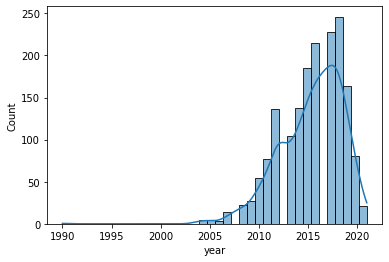

In [7]:
#Univariate analysis for numerical data using histplot for data(year)
sns.histplot(data.year,kde=True)

<Axes: xlabel='price', ylabel='Count'>

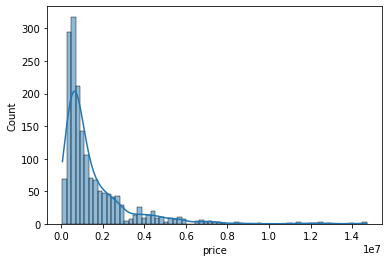

In [8]:
#Univariate analysis for numerical data using histplot for data(price)
sns.histplot(data.price,kde=True)

<Axes: xlabel='brand_rank', ylabel='Count'>

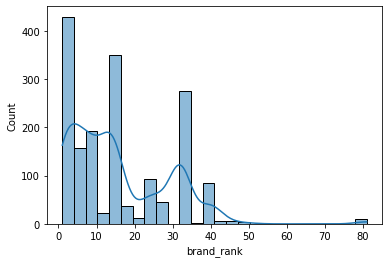

In [9]:
#Univariate analysis for numerical data using histplot for data(brand_rank)
sns.histplot(data.brand_rank,kde=True)

<Axes: xlabel='car_age', ylabel='Count'>

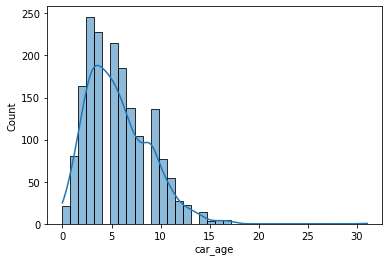

In [10]:
#Univariate analysis for numerical data using histplot for data(car_age)
sns.histplot(data.car_age,kde=True)

<Axes: xlabel='distance_travelled(kms)', ylabel='Count'>

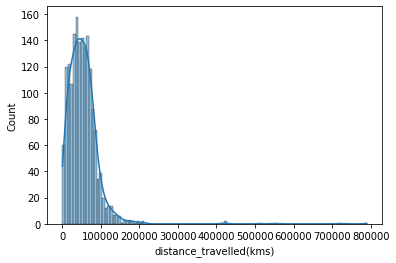

In [11]:
#Univariate analysis for numerical data using histplot for data(distance travelled)
sns.histplot(data['distance_travelled(kms)'],kde=True)

C:\Users\oluwaferanmi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


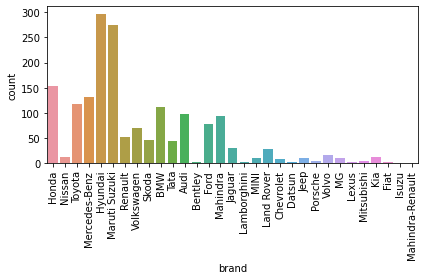

In [12]:
#Univariate analysis for categorical data(brand) using count plot
sns.countplot(data.brand)
plt.xticks(rotation=90)
plt.tight_layout()

C:\Users\oluwaferanmi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


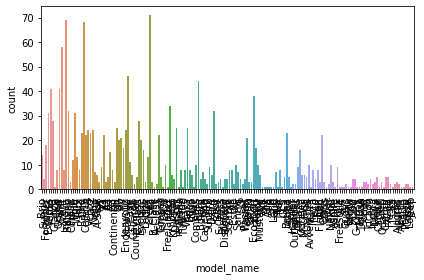

In [13]:
#Univariate analysis for categorical data(model_name) using count plot
sns.countplot(data.model_name)
plt.xticks(rotation=90)
plt.tight_layout()

C:\Users\oluwaferanmi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


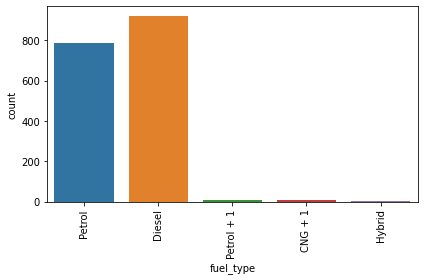

In [14]:
sns.countplot(data.fuel_type)
plt.xticks(rotation=90)
plt.tight_layout()

C:\Users\oluwaferanmi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


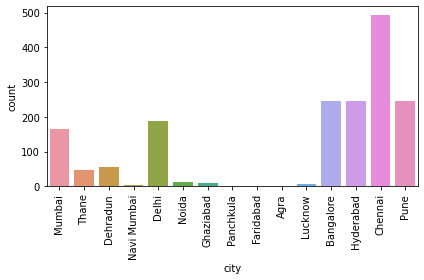

In [15]:
sns.countplot(data.city)
plt.xticks(rotation=90)
plt.tight_layout()

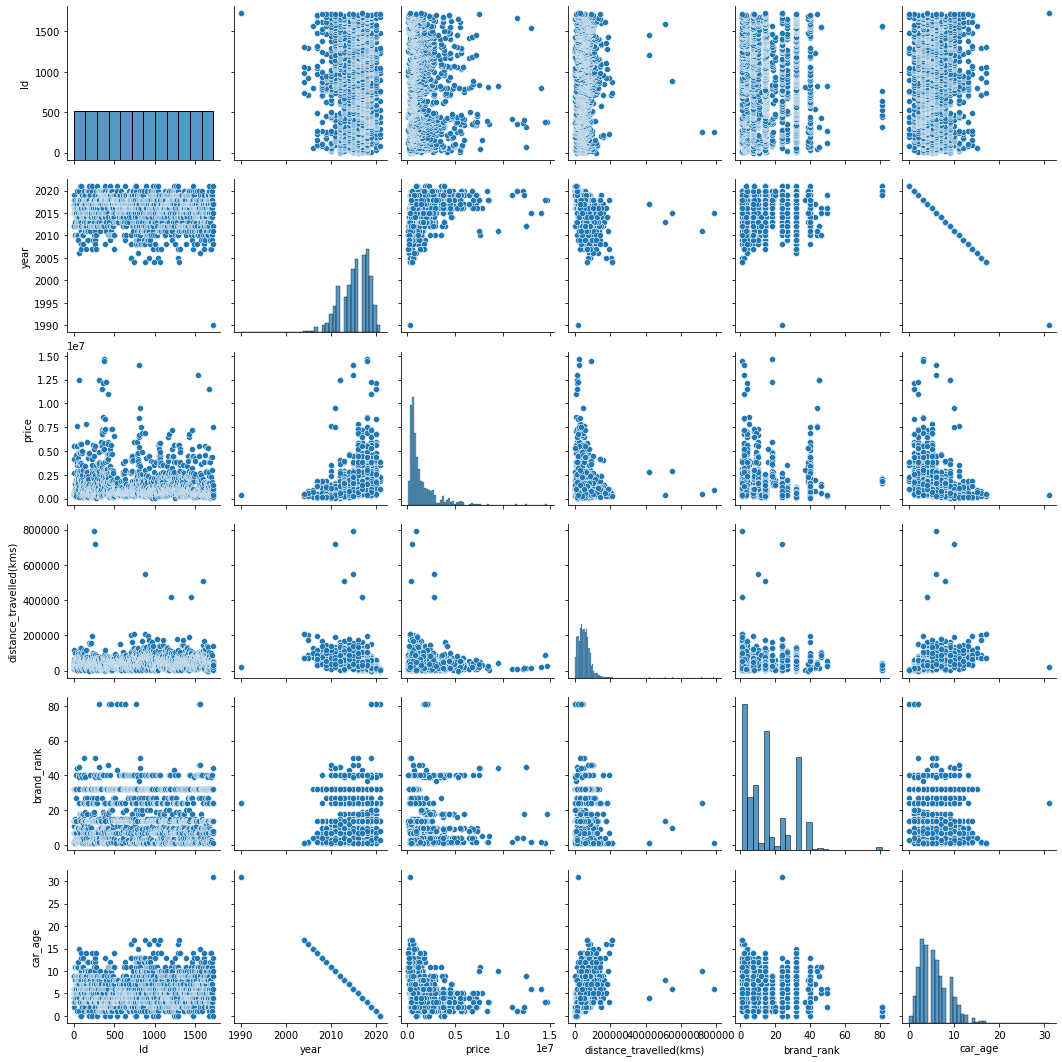

In [16]:
sns.pairplot(data)
plt.show()

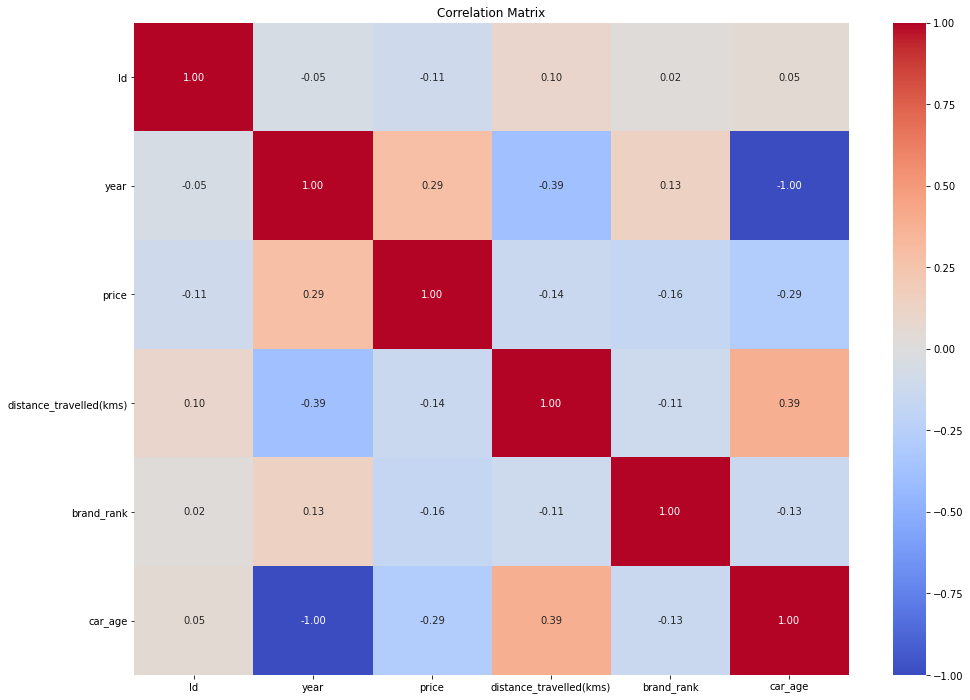

In [17]:
corr_mat = data.corr()
plt.figure(figsize=(16, 12))
sns.heatmap(corr_mat, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

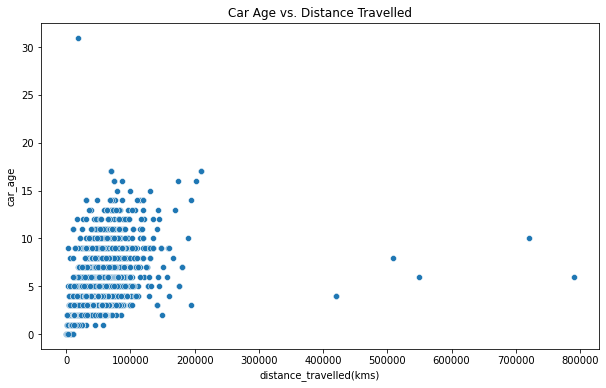

In [18]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='distance_travelled(kms)', y='car_age')
plt.title('Car Age vs. Distance Travelled')
plt.xlabel('distance_travelled(kms)')
plt.ylabel('car_age')
plt.show()

In [19]:
#investigate the relationship between independent variables (features) and a dependent variable (target) in regression analysis
#x = car_age, y=distance_traveled
x = data.iloc[:, -5].values.reshape(-1,1)
y = data.iloc[:, -1].values.reshape(-1,1)

In [20]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30)

In [21]:
#LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [22]:
pred = lr.predict(x_test)
print("MSE:",metrics.mean_squared_error(pred,y_test))

MSE: 8.866332880261956


In [23]:
print("Accuracy:",100-metrics.mean_squared_error(y_test,pred))

Accuracy: 91.13366711973805


In [24]:
#LogisticRegression
#lor = LogisticRegression()
#lor.fit(x_train,y_train)
#pred = lor.predict(x_test)
#print("MSE:",metrics.mean_squared_error(pred,y_test))
#print("Accuracy:",100-metrics.mean_squared_error(y_test,pred))

In [25]:
#lbl = LabelEncoder()
#data['brand'] = lbl.fit_transform(data['brand'])
#data['full_model_name'] = lbl.fit_transform(data['full_model_name'])
#data['model_name'] = lbl.fit_transform(data['model_name'])
#data['fuel_type'] = lbl.fit_transform(data['fuel_type'])
#data['city'] = lbl.fit_transform(data['city'])

In [26]:
#data.info()

In [27]:
x = data.loc[:, ['year','distance_travelled(kms)', 'brand_rank',
       'car_age']]
y = data['price']

In [28]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=42)

In [29]:
#1. Linear Regression
#lr = LinearRegression()
#lr.fit(x_train,y_train)
#pred = lr.predict(x_test)

#print("LinearRegressionMetrics:")
#print("MSE:",metrics.mean_squared_error(y_test,pred))
#print("RMSE:",math.sqrt(metrics.mean_squared_error(y_test,pred)))
#print("MAE:",metrics.mean_absolute_error(pred,y_test))
#print("R2:",r2_score(y_test,pred))

lor = LogisticRegression(random_state=42, max_iter=200)
lor.fit(x_train,y_train)
pred = lr.predict(x_test)

print("LoRegressionMetrics:")
print("MSE:",metrics.mean_squared_error(y_test,pred))
print("RMSE:",math.sqrt(metrics.mean_squared_error(y_test,pred)))
print("MAE:",metrics.mean_absolute_error(pred,y_test))
print("R2:",r2_score(y_test,pred))

ValueError: Unknown label type: 'continuous'

In [37]:
#2. Decision Tree
dt=DecisionTreeRegressor(random_state = 42)
dt.fit(x_train,y_train)
pred = dt.predict(x_test)

print("DecisionTreeMetrics:")
print("MSE:",metrics.mean_squared_error(y_test,pred))
print("RMSE:",math.sqrt(metrics.mean_squared_error(y_test,pred)))
print("MAE:",metrics.mean_absolute_error(y_test,pred))
print("R2:",metrics.r2_score(y_test,pred))

dt.feature_importances_
features=pd.DataFrame({'Features':x_train.columns,'Importance':np.round(dt.feature_importances_,3)})
features=features.sort_values('Importance',ascending=False)
features

DecisionTreeMetrics:
MSE: 1385072059148.434
RMSE: 1176890.8441943263
MAE: 459244.2084942085
R2: 0.4952391870432261


,Features,Importance
2,brand_rank,0.530
1,distance_travelled(kms),0.269
0,year,0.139
3,car_age,0.063


In [38]:
#3. Random Forest
rf=RandomForestRegressor(n_estimators=100,max_depth=3,random_state=42)
rf.fit(x_train,y_train)
pred = rf.predict(x_test)

print("RandomForestMetrics:")
print("MSE:",metrics.mean_squared_error(y_test,pred))
print("RMSE:",math.sqrt(metrics.mean_squared_error(y_test,pred)))
print("MAE:",metrics.mean_absolute_error(y_test,pred))
print("R2:",metrics.r2_score(y_test,pred))

features=pd.DataFrame({'Features':x_train.columns,'Importance':np.round(rf.feature_importances_,3)})
features=features.sort_values('Importance',ascending=False)
features

RandomForestMetrics:
MSE: 1991708158496.0854
RMSE: 1411278.9088256387
MAE: 832526.5939529232
R2: 0.27416323027032896


,Features,Importance
2,brand_rank,0.569
0,year,0.181
3,car_age,0.159
1,distance_travelled(kms),0.091


In [39]:
#4. Support Vector Regressor
svc = SVR(kernel = 'linear')
svc.fit(x_train, y_train)
pred = svc.predict(x_test)

print("SupportVectorMetrics:")
print("MSE:",metrics.mean_squared_error(y_test,pred))
print("RMSE:",math.sqrt(metrics.mean_squared_error(y_test,pred)))
print("MAE:",metrics.mean_absolute_error(y_test,pred))
print("R2:",metrics.r2_score(y_test,pred))

SupportVectorMetrics:
MSE: 3119884919617.327
RMSE: 1766319.597246582
MAE: 966882.0705619461
R2: -0.13697741424791476


In [30]:
dt=DecisionTreeRegressor(random_state = 42)
dt.fit(x_train,y_train)
pred = dt.predict(x_test)

print("DecisionTreeMetrics:")
print("MSE:",metrics.mean_squared_error(y_test,pred))
print("RMSE:",math.sqrt(metrics.mean_squared_error(y_test,pred)))
print("MAE:",metrics.mean_absolute_error(y_test,pred))
print("R2:",metrics.r2_score(y_test,pred))

dt.feature_importances_
features=pd.DataFrame({'Features':x_train.columns,'Importance':np.round(dt.feature_importances_,3)})
features=features.sort_values('Importance',ascending=False)
features

#Retrieve the hyperparameters
#params_keys = estimator.get_params().keys()
#print("Hyperparameters of :")
#for key in params_keys:
 #   print(key)


#GridSearch for DecisionTree
#params = { "n_estimators": [100, 150, 200,300], "max_depth": [10, 20,30],}
#rf_gsv=GridSearchCV(estimator=DecisionTreeRegressor(),param_grid=params,cv=3,scoring='neg_mean_squared_error')
#rf_gsv.fit(x_train,y_train)

#rf_gsv.best_params_
#rf_gsv.best_estimator_

params = {"max_features": [2,4,6], "max_depth": [1,2,3]}
rf_gsv=GridSearchCV(estimator=DecisionTreeRegressor(),param_grid=params,cv=3,scoring='neg_mean_squared_error')
rf_gsv.fit(x_train,y_train)
rf_gsv.best_params_
rf_gsv.best_estimator_


DecisionTreeMetrics:
MSE: 1385072059148.434
RMSE: 1176890.8441943263
MAE: 459244.2084942085
R2: 0.4952391870432261


C:\Users\oluwaferanmi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\oluwaferanmi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\oluwaferanmi\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1247, in fit
    super().fit(
  File "C:\Users\oluwaferanmi\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 288, in fit
    raise ValueError("max_features must be in (0, n_features]")
ValueError: max_features must be in (0, n_features]

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oluwaferanmi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this trai

DecisionTreeRegressor(max_depth=3, max_features=4)

In [31]:
dt=DecisionTreeRegressor(max_depth=3, max_features=4)
dt.fit(x_train,y_train)
pred = dt.predict(x_test)

print("DecisionTreeMetrics:")
print("MSE:",metrics.mean_squared_error(y_test,pred))
print("RMSE:",math.sqrt(metrics.mean_squared_error(y_test,pred)))
print("MAE:",metrics.mean_absolute_error(y_test,pred))
print("R2:",metrics.r2_score(y_test,pred))

dt.feature_importances_
features=pd.DataFrame({'Features':x_train.columns,'Importance':np.round(dt.feature_importances_,3)})
features=features.sort_values('Importance',ascending=False)
features



#Using GridSearch for the Best Parameters
#rf=RandomForestRegressor(n_estimators=150,max_depth=20,random_state=42)
#rf.fit(x_train,y_train)
#pred = rf.predict(x_test)

#print("RandomForestMetrics:")
#print("MSE:",metrics.mean_squared_error(y_test,pred))
#print("RMSE:",math.sqrt(metrics.mean_squared_error(y_test,pred)))
#print("MAE:",metrics.mean_absolute_error(y_test,pred))
#print("R2:",metrics.r2_score(y_test,pred))

#features=pd.DataFrame({'Features':x_train.columns,'Importance':np.round(rf.feature_importances_,3)})
#features=features.sort_values('Importance',ascending=False)
#features

DecisionTreeMetrics:
MSE: 2099575288342.9233
RMSE: 1448991.1277654269
MAE: 847043.4733186102
R2: 0.23485328982847298


,Features,Importance
2,brand_rank,0.641
0,year,0.220
1,distance_travelled(kms),0.070
3,car_age,0.070


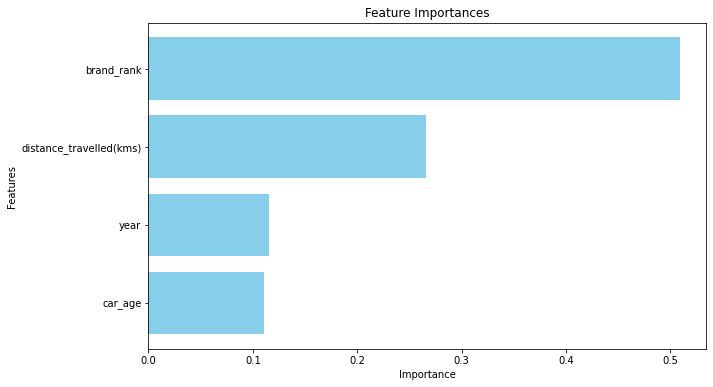

In [70]:
#Bar Graph of the Features importance
plt.figure(figsize=(10, 6))
plt.barh(features['Features'], features['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importances')
plt.gca().invert_yaxis()  # Invert y-axis for better visualization
plt.show()

In [85]:
# List out the most important features determining the price of used cars
#The important features are as shown above;
#1.brand_rank, 
#2.distance_travelled(kms),
#3.year 
#4.and car_age